# How do I create dummy variables in pandas?

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('http://bit.ly/kaggletrain')

In [3]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
# using .map

In [7]:
train['Sex_male'] = train.Sex.map({'female':0,'male':1})

In [84]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                  Name     Sex  Age  SibSp  \
0                              Braund, Mr. Owen Harris    male (:,)      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female (:,)      1   
2                               Heikkinen, Miss. Laina  female (:,)      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female (:,)      1   
4                             Allen, Mr. William Henry    male (:,)      0   

   Parch            Ticket  Fare Cabin Embarked  
0      0         A/5 21171  (:,)   NaN        S  
1      0          PC 17599  (:,)   C85        C  
2      0  STON/O2. 3101282  (:,)   NaN        S  
3      0            113803  (:,)  C123        S  
4      0            373450  (:,)   NaN        S

# using pd.get_dummies

In [11]:
pd.get_dummies(train.Sex)
# if you have k possible values for categorical values, you require k-1 dummy variables
# there are male and female so you want 2-1 variable

female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
..      ...   ...
886       0     1
887       1     0
888       1     0
889       0     1
890       0     1

[891 rows x 2 columns]

In [15]:
pd.get_dummies(train.Sex).iloc[:, 1:]

male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[891 rows x 1 columns]

# when there are more than 2 categorical variable

In [17]:
# categorical variables for embarked

In [18]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
pd.get_dummies(train.Embarked)

C  Q  S
0    0  0  1
1    1  0  0
2    0  0  1
3    0  0  1
4    0  0  1
..  .. .. ..
886  0  0  1
887  0  0  1
888  0  0  1
889  1  0  0
890  0  1  0

[891 rows x 3 columns]

In [20]:
pd.get_dummies(train.Embarked, prefix = 'Embarked')

Embarked_C  Embarked_Q  Embarked_S
0             0           0           1
1             1           0           0
2             0           0           1
3             0           0           1
4             0           0           1
..          ...         ...         ...
886           0           0           1
887           0           0           1
888           0           0           1
889           1           0           0
890           0           1           0

[891 rows x 3 columns]

In [23]:
embarked_dummies = pd.get_dummies(train.Embarked, prefix = 'Embarked').iloc[:, 1:]
# we have 3 different fields, so we require dummy variables equal to 3-1 =2
# so drop Embarked_C

In [24]:
embarked_dummies

Embarked_Q  Embarked_S
0             0           1
1             0           0
2             0           1
3             0           1
4             0           1
..          ...         ...
886           0           1
887           0           1
888           0           1
889           0           0
890           1           0

[891 rows x 2 columns]

# now concat the above variable in the main data set

In [28]:
train = pd.concat([train, embarked_dummies], axis = 1)
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Sex_male  Embarked_Q  \
0      0         A/5 21171   7.2500   NaN        S         1           0   
1      0          PC 17599  71.2833   C85        C         0           0   
2      0  STON/O2. 3101282   7.9250   NaN        S         0           0   
3      0            113803  53.1000  C123        S         0           0   
4      0            373450   8.0500   NaN        S         1           0   

   Embarked_S  Embarked_Q  Embarked_S  
0           1           0           1  
1           0           0           0  
2           1           0           1  
3           1           0           1  
4           1           0           1

In [ ]:
pd.drop()

In [3]:
import pandas as pd
train_2 = pd.read_csv('http://bit.ly/kaggletrain')

In [4]:
train_2.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# getting dummies, directly from dataframe

In [6]:
pd.get_dummies(train_2, columns = ['Sex', 'Embarked'])

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name   Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris  22.0      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                               Heikkinen, Miss. Laina  26.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                             Allen, Mr. William Henry  35.0      0      0   
..                                                 ...   ...    ...    ...   
886                              Montvila, Rev. Juozas  27.0      0      0   
887                       Graham, Miss. Margaret Edith  19.0      0      0   
888           Johnston, Miss. Catherine Helen "Carrie"   NaN      1      2   
889                              Behr, Mr. Karl Howell  26.0      0      0   
890                                Dooley, Mr. Patrick  32.0      0      0   

               Ticket     Fare Cabin  Sex_female  Sex_male  Embarked_C  \
0           A/5 21171   7.2500   NaN           0         1           0   
1            PC 17599  71.2833   C85           1         0           1   
2    STON/O2. 3101282   7.9250   NaN           1         0           0   
3              113803  53.1000  C123           1         0           0   
4              373450   8.0500   NaN           0         1           0   
..                ...      ...   ...         ...       ...         ...   
886            211536  13.0000   NaN           0         1           0   
887            112053  30.0000   B42           1         0           0   
888        W./C. 6607  23.4500   NaN           1         0           0   
889            111369  30.0000  C148           0         1           1   
890            370376   7.7500   NaN           0         1           0   

     Embarked_Q  Embarked_S  
0             0           1  
1             0           0  
2             0           1  
3             0           1  
4             0           1  
..          ...         ...  
886           0           1  
887           0           1  
888           0           1  
889           0           0  
890           1           0  

[891 rows x 15 columns]

In [8]:
pd.get_dummies(train_2, columns = ['Sex', 'Embarked'], drop_first= True)
# drop_first is used to remove the unnecessory columns 
# Sex_female and Embarked_C are removed

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name   Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris  22.0      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                               Heikkinen, Miss. Laina  26.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                             Allen, Mr. William Henry  35.0      0      0   
..                                                 ...   ...    ...    ...   
886                              Montvila, Rev. Juozas  27.0      0      0   
887                       Graham, Miss. Margaret Edith  19.0      0      0   
888           Johnston, Miss. Catherine Helen "Carrie"   NaN      1      2   
889                              Behr, Mr. Karl Howell  26.0      0      0   
890                                Dooley, Mr. Patrick  32.0      0      0   

               Ticket     Fare Cabin  Sex_male  Embarked_Q  Embarked_S  
0           A/5 21171   7.2500   NaN         1           0           1  
1            PC 17599  71.2833   C85         0           0           0  
2    STON/O2. 3101282   7.9250   NaN         0           0           1  
3              113803  53.1000  C123         0           0           1  
4              373450   8.0500   NaN         1           0           1  
..                ...      ...   ...       ...         ...         ...  
886            211536  13.0000   NaN         1           0           1  
887            112053  30.0000   B42         0           0           1  
888        W./C. 6607  23.4500   NaN         0           0           1  
889            111369  30.0000  C148         1           0           0  
890            370376   7.7500   NaN         1           1           0  

[891 rows x 13 columns]

# working with dates and times in pandas

In [9]:
import pandas as pd

In [10]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [11]:
ufo.head()

City Colors Reported Shape Reported State             Time
0                Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1           Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2               Holyoke             NaN           OVAL    CO  2/15/1931 14:00
3               Abilene             NaN           DISK    KS   6/1/1931 13:00
4  New York Worlds Fair             NaN          LIGHT    NY  4/18/1933 19:00

In [13]:
ufo.dtypes
# time columns is object

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

# convert time column to pandas time format

In [18]:
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.head()

City Colors Reported Shape Reported State  \
0                Ithaca             NaN       TRIANGLE    NY   
1           Willingboro             NaN          OTHER    NJ   
2               Holyoke             NaN           OVAL    CO   
3               Abilene             NaN           DISK    KS   
4  New York Worlds Fair             NaN          LIGHT    NY   

                 Time  
0 1930-06-01 22:00:00  
1 1930-06-30 20:00:00  
2 1931-02-15 14:00:00  
3 1931-06-01 13:00:00  
4 1933-04-18 19:00:00

In [21]:
ufo.dtypes
# time has changed to datetime format

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [24]:
ufo.Time.dt.hour
# to find hour

0        22
1        20
2        14
3        13
4        19
         ..
18236    23
18237    23
18238    23
18239    23
18240    23
Name: Time, Length: 18241, dtype: int64

In [25]:
ufo.Time.dt.weekday_name
# to find day

0         Sunday
1         Monday
2         Sunday
3         Monday
4        Tuesday
          ...   
18236     Sunday
18237     Sunday
18238     Sunday
18239     Sunday
18240     Sunday
Name: Time, Length: 18241, dtype: object

In [26]:
ufo.Time.dt.dayofyear

0        152
1        181
2         46
3        152
4        108
        ... 
18236    366
18237    366
18238    366
18239    366
18240    366
Name: Time, Length: 18241, dtype: int64

In [28]:
ts = pd.to_datetime('1/1/1999')

In [34]:
ts 
# time to filter 

Timestamp('1999-01-01 00:00:00')

In [36]:
ufo.loc[ufo.Time >= ts, :].head()

City Colors Reported Shape Reported State  \
12832          Loma Rica             NaN          LIGHT    CA   
12833            Bauxite             NaN            NaN    AR   
12834           Florence             NaN       CYLINDER    SC   
12835       Lake Henshaw             NaN          CIGAR    CA   
12836  Wilmington Island             NaN          LIGHT    GA   

                     Time  
12832 1999-01-01 02:30:00  
12833 1999-01-01 03:00:00  
12834 1999-01-01 14:00:00  
12835 1999-01-01 15:00:00  
12836 1999-01-01 17:15:00

In [38]:
ufo.Time.max()
# latest time 

Timestamp('2000-12-31 23:59:00')

In [41]:
(ufo.Time.max() - ufo.Time.min()).days

25781

# ploting nos of seeing ufo vs time

In [42]:
%matplotlib inline

In [47]:
ufo['Year'] = ufo.Time.dt.year
ufo.head()
# created a new column

City Colors Reported Shape Reported State  \
0                Ithaca             NaN       TRIANGLE    NY   
1           Willingboro             NaN          OTHER    NJ   
2               Holyoke             NaN           OVAL    CO   
3               Abilene             NaN           DISK    KS   
4  New York Worlds Fair             NaN          LIGHT    NY   

                 Time  Year  
0 1930-06-01 22:00:00  1930  
1 1930-06-30 20:00:00  1930  
2 1931-02-15 14:00:00  1931  
3 1931-06-01 13:00:00  1931  
4 1933-04-18 19:00:00  1933

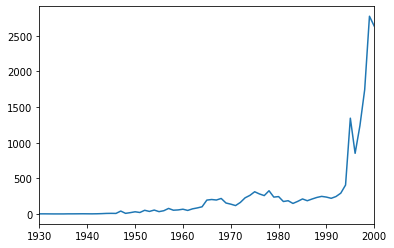

In [53]:
ufo.Year.value_counts().sort_index().plot()
# nos of times a year appeared

# removing duplicate rows in pandas

In [56]:
import pandas as pd

In [60]:
user_cols = ['user_id','age','gender', 'occupation', 'zip_code']

In [61]:
users = pd.read_table('http://bit.ly/movieusers', sep ='|', header = None, names = user_cols, index_col= 'user_id')

In [64]:
users.head()
# data set of movie reviewer

age gender  occupation zip_code
user_id                                 
1         24      M  technician    85711
2         53      F       other    94043
3         23      M      writer    32067
4         24      M  technician    43537
5         33      F       other    15213

In [65]:
users.shape

(943, 4)

In [66]:
# identify duplicate zip codes

In [70]:
users.zip_code.duplicated()
# series, returns zip code True if there is above same

user_id
1      False
2      False
3      False
4      False
5      False
       ...  
939    False
940     True
941    False
942    False
943    False
Name: zip_code, Length: 943, dtype: bool

In [72]:
users.zip_code.duplicated().sum()
# there are 148 duplicates

148

In [74]:
users.duplicated()
# it will display true when entire row is identical to previous above row

user_id
1      False
2      False
3      False
4      False
5      False
       ...  
939    False
940    False
941    False
942    False
943    False
Length: 943, dtype: bool

In [76]:
users.duplicated().sum()
# there are 7 rows

7

In [80]:
users.loc[users.duplicated(), :]
# below are repeated  rows

age gender occupation zip_code
user_id                                
496       21      F    student    55414
572       51      M   educator    20003
621       17      M    student    60402
684       28      M    student    55414
733       44      F      other    60630
805       27      F      other    20009
890       32      M    student    97301

In [81]:
users.loc[users.duplicated(keep = 'last'), :]
# keep last means that rows which first appeared will be considered as duplicates

age gender occupation zip_code
user_id                                
67        17      M    student    60402
85        51      M   educator    20003
198       21      F    student    55414
350       32      M    student    97301
428       28      M    student    55414
437       27      F      other    20009
460       44      F      other    60630

In [83]:
users.loc[users.duplicated(keep = 'first'), :]
# keep first means that rows which appeared last will be considered as duplicates

age gender occupation zip_code
user_id                                
496       21      F    student    55414
572       51      M   educator    20003
621       17      M    student    60402
684       28      M    student    55414
733       44      F      other    60630
805       27      F      other    20009
890       32      M    student    97301

In [87]:
users.loc[users.duplicated(keep = False), :]
# it will show all rows with entire similar row 

age gender occupation zip_code
user_id                                
67        17      M    student    60402
85        51      M   educator    20003
198       21      F    student    55414
350       32      M    student    97301
428       28      M    student    55414
437       27      F      other    20009
460       44      F      other    60630
496       21      F    student    55414
572       51      M   educator    20003
621       17      M    student    60402
684       28      M    student    55414
733       44      F      other    60630
805       27      F      other    20009
890       32      M    student    97301

# how to drop duplicate

In [88]:
users.drop_duplicates(keep = 'first')

age gender     occupation zip_code
user_id                                    
1         24      M     technician    85711
2         53      F          other    94043
3         23      M         writer    32067
4         24      M     technician    43537
5         33      F          other    15213
...      ...    ...            ...      ...
939       26      F        student    33319
940       32      M  administrator    02215
941       20      M        student    97229
942       48      F      librarian    78209
943       22      M        student    77841

[936 rows x 4 columns]

In [90]:
users.drop_duplicates(keep = 'first').shape
# it has droped 7 rows, earlier it had 943 rows

(936, 4)

In [95]:
users.drop_duplicates(keep = False).shape
# it has droped all duplicate rows, 7 more than last

(929, 4)

# changing the display options in pandas

In [1]:
import pandas as pd

In [2]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [3]:
drinks

country  beer_servings  spirit_servings  wine_servings  \
0    Afghanistan              0                0              0   
1        Albania             89              132             54   
2        Algeria             25                0             14   
3        Andorra            245              138            312   
4         Angola            217               57             45   
..           ...            ...              ...            ...   
188    Venezuela            333              100              3   
189      Vietnam            111                2              1   
190        Yemen              6                0              0   
191       Zambia             32               19              4   
192     Zimbabwe             64               18              4   

     total_litres_of_pure_alcohol      continent  
0                             0.0           Asia  
1                             4.9         Europe  
2                             0.7         Africa  
3                            12.4         Europe  
4                             5.9         Africa  
..                            ...            ...  
188                           7.7  South America  
189                           2.0           Asia  
190                           0.1           Asia  
191                           2.5         Africa  
192                           4.7         Africa  

[193 rows x 6 columns]

# pandas get_option

In [5]:
pd.get_option('display.max_rows')
# 60 means 30 top and 30 last rows are displayed

60

In [6]:
pd.set_option('display.max_rows', None)

In [8]:
drinks
# now you can see whole data

country  beer_servings  spirit_servings  \
0                     Afghanistan              0                0   
1                         Albania             89              132   
2                         Algeria             25                0   
3                         Andorra            245              138   
4                          Angola            217               57   
5               Antigua & Barbuda            102              128   
6                       Argentina            193               25   
7                         Armenia             21              179   
8                       Australia            261               72   
9                         Austria            279               75   
10                     Azerbaijan             21               46   
11                        Bahamas            122              176   
12                        Bahrain             42               63   
13                     Bangladesh              0                0   
14                       Barbados            143              173   
15                        Belarus            142              373   
16                        Belgium            295               84   
17                         Belize            263              114   
18                          Benin             34                4   
19                         Bhutan             23                0   
20                        Bolivia            167               41   
21             Bosnia-Herzegovina             76              173   
22                       Botswana            173               35   
23                         Brazil            245              145   
24                         Brunei             31                2   
25                       Bulgaria            231              252   
26                   Burkina Faso             25                7   
27                        Burundi             88                0   
28                  Cote d'Ivoire             37                1   
29                     Cabo Verde            144               56   
30                       Cambodia             57               65   
31                       Cameroon            147                1   
32                         Canada            240              122   
33       Central African Republic             17                2   
34                           Chad             15                1   
35                          Chile            130              124   
36                          China             79              192   
37                       Colombia            159               76   
38                        Comoros              1                3   
39                          Congo             76                1   
40                   Cook Islands              0              254   
41                     Costa Rica            149               87   
42                        Croatia            230               87   
43                           Cuba             93              137   
44                         Cyprus            192              154   
45                 Czech Republic            361              170   
46                    North Korea              0                0   
47                       DR Congo             32                3   
48                        Denmark            224               81   
49                       Djibouti             15               44   
50                       Dominica             52              286   
51             Dominican Republic            193              147   
52                        Ecuador            162               74   
53                          Egypt              6                4   
54                    El Salvador             52               69   
55              Equatorial Guinea             92                0   
56                        Eritrea             18                0   
57                      

# reset 

In [11]:
pd.reset_option('display.max_rows')

In [13]:
pd.get_option('display.max_columns')
# 20 columns

20

In [14]:
train = pd.read_csv('http://bit.ly/kaggletrain')

In [16]:
train.head()
# here name is not completely visible

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [18]:
pd.get_option('display.max_colwidth')
# it displays how many characters are displayed

50

In [21]:
pd.set_option('display.max_colwidth', 100)
train.head()
# now it is showing full name

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [22]:
# now suppose you want to reduce no of decimal points in fare

In [24]:
pd.get_option('display.precision')
# 6 digits after decimal point

6

In [27]:
pd.set_option('display.precision', 2)
# it will display 2 digits after decimal point

In [28]:
train.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket   Fare Cabin Embarked  
0      0         A/5 21171   7.25   NaN        S  
1      0          PC 17599  71.28   C85        C  
2      0  STON/O2. 3101282   7.92   NaN        S  
3      0            113803  53.10  C123        S  
4      0            373450   8.05   NaN        S

In [29]:
drinks.head()

country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol continent  
0                           0.0      Asia  
1                           4.9    Europe  
2                           0.7    Africa  
3                          12.4    Europe  
4                           5.9    Africa

In [30]:
drinks['x'] = drinks.wine_servings* 1000
drinks['y'] = drinks.total_litres_of_pure_alcohol * 1000
drinks.head()

country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol continent       x        y  
0                           0.0      Asia       0      0.0  
1                           4.9    Europe   54000   4900.0  
2                           0.7    Africa   14000    700.0  
3                          12.4    Europe  312000  12400.0  
4                           5.9    Africa   45000   5900.0

# how to get ,s in x and y columns

In [32]:
pd.set_option('display.float_format', '(:,)'.format)
# used to set , as 1000 seperator

In [33]:
drinks.head()

country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol continent       x    y  
0                          (:,)      Asia       0 (:,)  
1                          (:,)    Europe   54000 (:,)  
2                          (:,)    Africa   14000 (:,)  
3                          (:,)    Europe  312000 (:,)  
4                          (:,)    Africa   45000 (:,)

In [36]:
pd.describe_option()
# it will display all options description

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]display.column_space No description available.
    [default: 12] [currently: 12]display.date_dayfirst : boolean
    When True, prints and parses dates with the day first, eg 20/01/2005
    [default: False] [currently: False]display.date_yearfirst : bool

In [37]:
pd.describe_option('row')
# it will show options where rows are there


display.latex.multirow : bool
    This specifies if the to_latex method of a Dataframe uses multirows
    to pretty-print MultiIndex rows.
    Valid values: False,True
    [default: False] [currently: False]display.max_info_rows : int or None
    df.info() will usually show null-counts for each column.
    For large frames this can be quite slow. max_info_rows and max_info_cols
    limit this null check only to frames with smaller dimensions than
    specified.
    [default: 1690785] [currently: 1690785]display.max_rows : int
    If max_rows is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the height of the terminal and print a truncated object which fits
    the screen height. The IPython notebook, IPython qtconsole, or
 

# How to create a pandas DataFrame from another object?


In [38]:
import pandas as pd

In [41]:
pd.DataFrame({'id':[100,101,102], 'color':['red','blue','red']})

id color
0  100   red
1  101  blue
2  102   red

In [50]:
df = pd.DataFrame({'id':[100,101,102], 'color':['red','blue','red']}, columns = ['color','id'] , index = ['a','b','c'])
# here we have defined the column order

In [51]:
df

color   id
a   red  100
b  blue  101
c   red  102

In [56]:
pd.DataFrame([[100,'red'],[101,'blue'],[102, 'red']],columns = ['id','color'])

id color
0  100   red
1  101  blue
2  102   red

In [57]:
import numpy as np

In [64]:
arr = np.random.rand(4,2) # 4 rown and 2 columns

In [65]:
arr

array([[0.38331358, 0.58928861],
       [0.71647977, 0.83776058],
       [0.60162527, 0.12004433],
       [0.26257071, 0.95006918]])

In [66]:
type(arr)

numpy.ndarray

In [70]:
pd.DataFrame(arr, columns = ['one', 'two'])


one  two
0 (:,) (:,)
1 (:,) (:,)
2 (:,) (:,)
3 (:,) (:,)

In [74]:
pd.DataFrame({'student': np.arange(100,110,1),'test':np.random.randint(60,101,10) })

student  test
0      100    90
1      101    83
2      102    63
3      103    96
4      104    83
5      105    96
6      106    68
7      107    87
8      108    98
9      109    96

In [76]:
pd.DataFrame({'student': np.arange(100,110,1),'test':np.random.randint(60,101,10)}).set_index('student')

test
student      
100        71
101        86
102        88
103        74
104        66
105        97
106        84
107        78
108        92
109        89

In [79]:
s= pd.Series(['round','square'], index = ['c','b'], name= 'shape')
s
# name is the identifier of this series

c     round
b    square
Name: shape, dtype: object

In [80]:
df

color   id
a   red  100
b  blue  101
c   red  102

In [83]:
pd.concat([df, s], axis = 1)
# name of the above series became column name of this concatted series
#NaN is missing value

C:\Users\itsme_shaad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


color   id   shape
a   red  100     NaN
b  blue  101  square
c   red  102   round